In [100]:
import pandas as pd

file_path = 'Salary_Data.csv'
df = pd.read_csv(file_path)


In [101]:
#Checkin Head
df.head(5)



,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [102]:
#Checkin Tail
df.tail(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0
6703,26.0,Female,High School,Sales Executive,1.0,35000.0


In [ ]:
#After checking head and tail I saw that there's both Banchelor's degree and Banchelor's and renamed it to only Bachelor's,did the same for PhD and Master's 
df['Education Level'] = df['Education Level'].replace("Bachelor's Degree","Bachelor's")
df['Education Level'] = df['Education Level'].replace("Master's Degree","Master's")
df['Education Level'] = df['Education Level'].replace("phD","PhD")

In [90]:
df.tail(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's,Marketing Manager,14.0,140000.0
6703,26.0,Female,High School,Sales Executive,1.0,35000.0


In [104]:
# fill the missing data,filling with median of given table
df.loc[:, 'Years of Experience'] = df['Years of Experience'].fillna(df['Years of Experience'].median())
df.loc[:, 'Salary'] = df['Salary'].fillna(df['Salary'].median())
df.loc[:, 'Education Level'] = df['Education Level'].fillna(df['Education Level'].mode()[0])
# removing the duplicates
df = df.drop_duplicates()

In [105]:
print(df.describe())
print("------------------------------")
df['Job Title'].value_counts()

               Age  Years of Experience         Salary
count  1790.000000          1791.000000    1791.000000
mean     35.130726             9.152987  113216.631491
std       8.211276             6.837217   51518.216878
min      21.000000             0.000000     350.000000
25%      29.000000             3.000000   70000.000000
50%      33.000000             8.000000  110000.000000
75%      41.000000            13.000000  160000.000000
max      62.000000            34.000000  250000.000000
------------------------------


Job Title
Software Engineer Manager         127
Full Stack Engineer               123
Senior Software Engineer           96
Senior Project Engineer            95
Back end Developer                 81
                                 ... 
Junior Social Media Specialist      1
Developer                           1
Social M                            1
Social Media Man                    1
Delivery Driver                     1
Name: count, Length: 193, dtype: int64

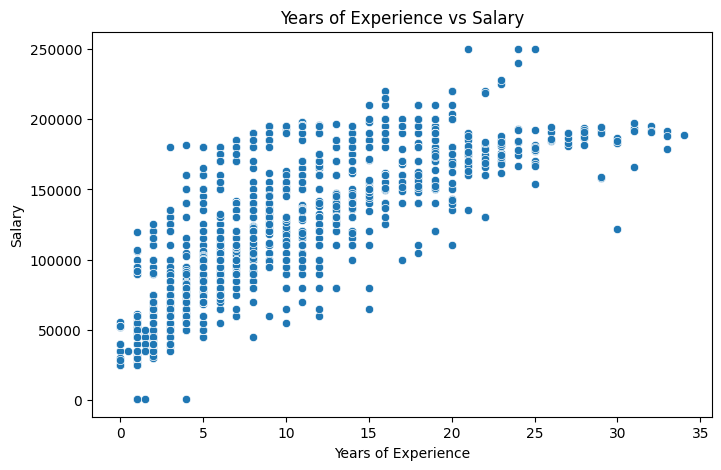

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Years of Experience'], y=df['Salary'])
plt.title("Years of Experience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_6124\3324045561.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Job Title", y="Salary", data=filtered_df, errorbar=None, palette="Reds", order=avg_salary.index)


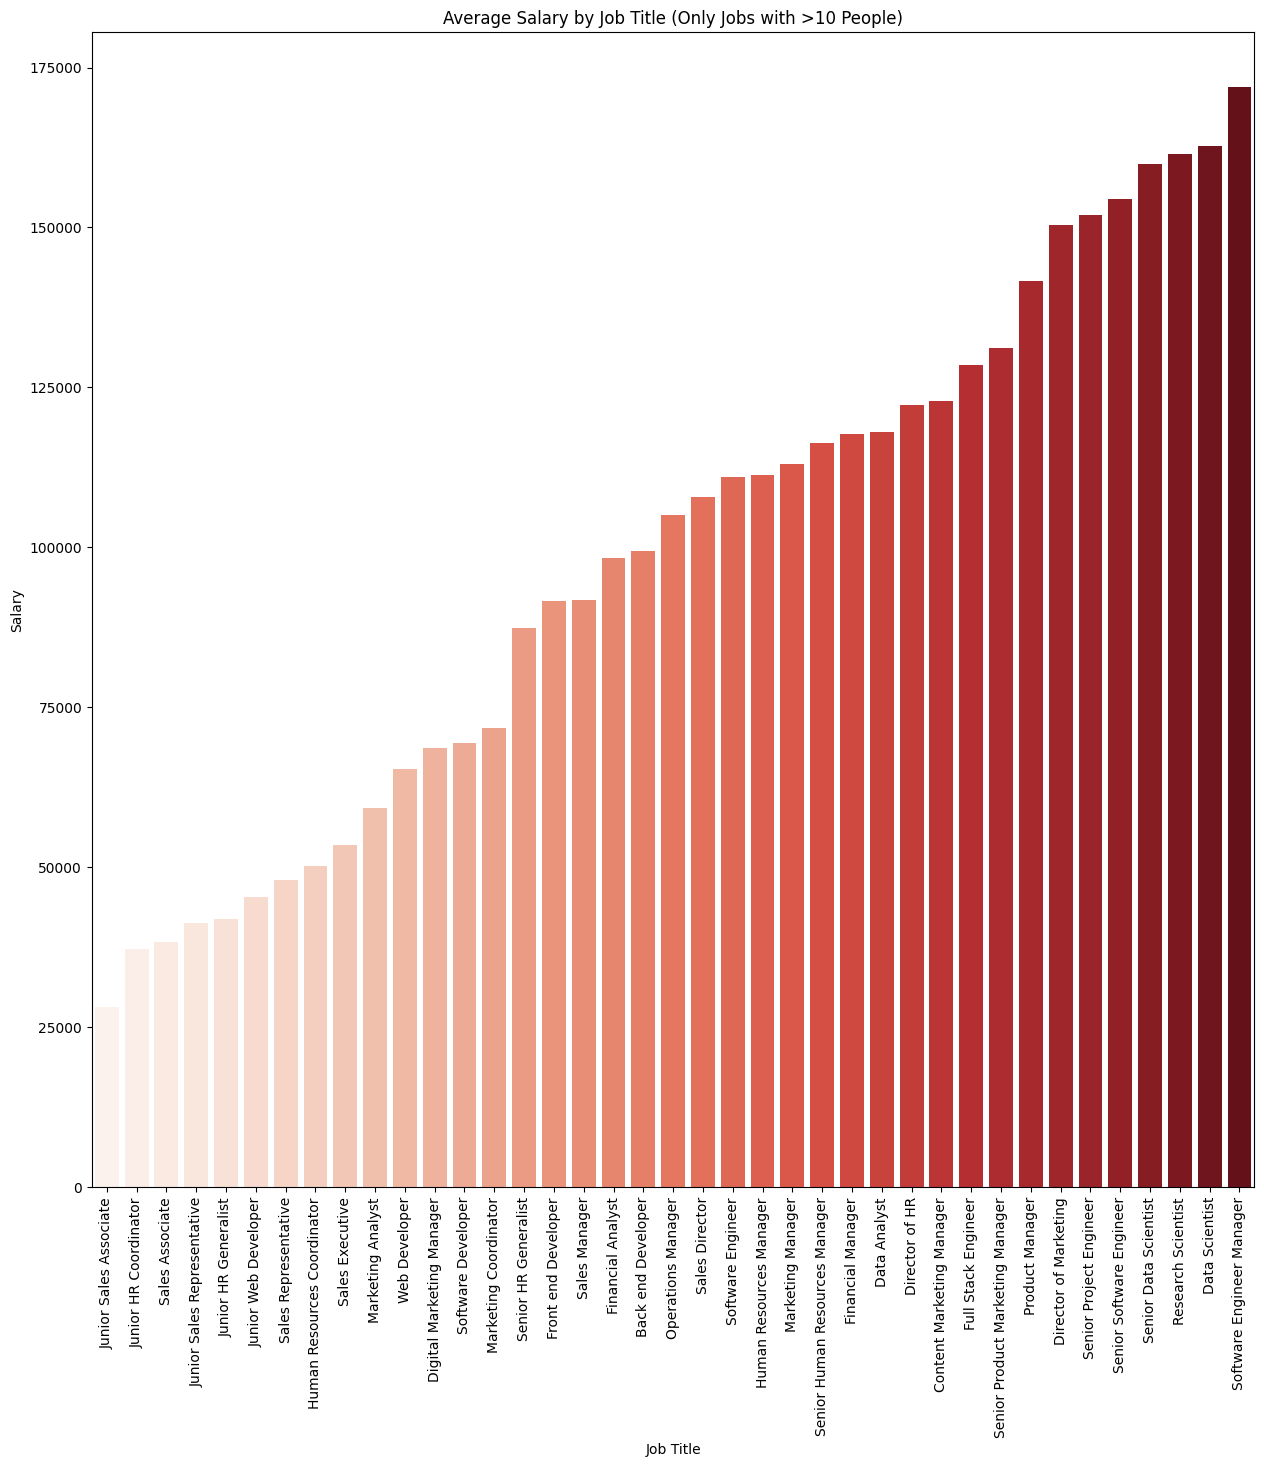

In [107]:
# Filter job titles that appear more than 10 times
job_counts = df['Job Title'].value_counts()
popular_jobs = job_counts[job_counts > 10].index

# Filter the DataFrame
filtered_df = df[df['Job Title'].isin(popular_jobs)]

#avg salary
avg_salary=(
    filtered_df.groupby('Job Title')['Salary'].mean().sort_values(ascending=True)
)

# Plot
plt.figure(figsize=(15, 15))
sns.barplot(x="Job Title", y="Salary", data=filtered_df, errorbar=None, palette="Reds", order=avg_salary.index)
plt.title("Average Salary by Job Title (Only Jobs with >10 People)")
plt.xticks(rotation=90)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_6124\2540139405.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Education Level", y="Salary", data=df, errorbar=None, palette="Blues")


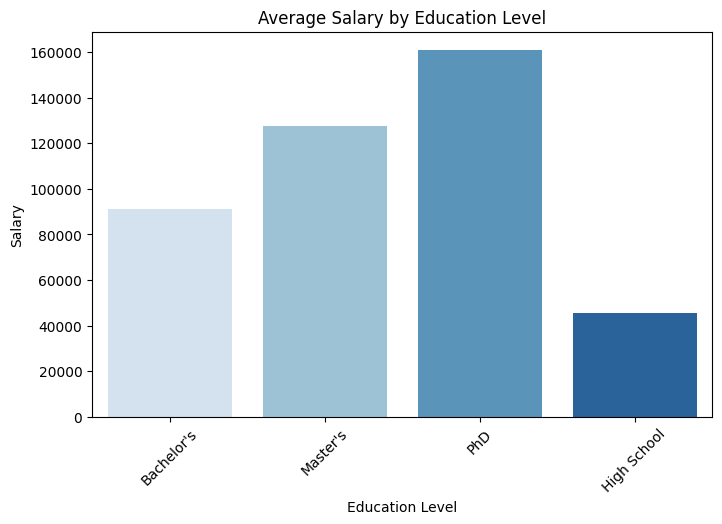

In [108]:
#avg salary by Job

plt.figure(figsize=(8, 5))
sns.barplot(x="Education Level", y="Salary", data=df, errorbar=None, palette="Blues")
plt.title("Average Salary by Education Level")
plt.xticks(rotation=45)
plt.show()

Mean Absolute Error: 22896.600674361678
R-squared: 0.666145016106082


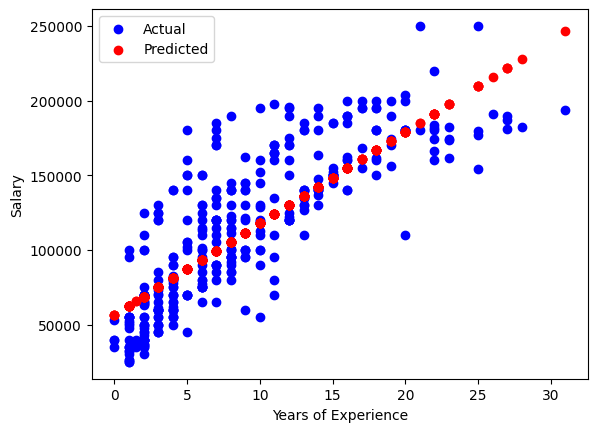

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# preparing the dataset
df = pd.get_dummies(df, columns=['Education Level', 'Gender'], drop_first=True)  # One-hot encoding
X = df[['Years of Experience']]
y = df['Salary']

# splitting into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# training the model
model = LinearRegression()
model.fit(X_train, y_train)

# predicting the salaries
y_pred = model.predict(X_test)

# evaluating the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

# Visualization of Predictions
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.scatter(X_test, y_pred, color="red", label="Predicted")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()